<a href="https://colab.research.google.com/github/ChinmayiAnandAradhya/Deep-learning/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnsit=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnsit.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(350,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
hidden1=model.layers[1]
weights,biases=hidden1.get_weights()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 350)                 │         175,350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          35,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 603,960 (2.30 MB)

 Trainable params: 603,960 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [ ]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6811 - loss: 0.9971 - val_accuracy: 0.8384 - val_loss: 0.4756
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8293 - loss: 0.4861 - val_accuracy: 0.8434 - val_loss: 0.4505
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8505 - loss: 0.4241 - val_accuracy: 0.8590 - val_loss: 0.4061
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8602 - loss: 0.3969 - val_accuracy: 0.8702 - val_loss: 0.3695
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8713 - loss: 0.3683 - val_accuracy: 0.8690 - val_loss: 0.3755
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8726 - loss: 0.3542 - val_accuracy: 0.8748 - val_loss: 0.3441
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8776 - loss: 0.3403 - val_accuracy: 0.8770 - val_loss: 0.3441
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8850 - loss: 0

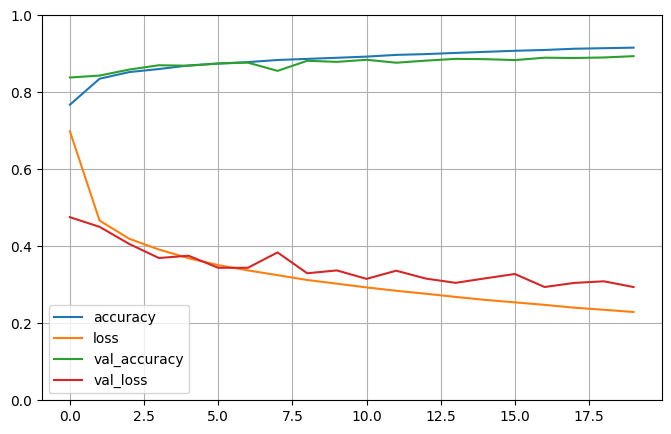

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8359 - loss: 66.3838


[68.6429443359375, 0.8334000110626221]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
model.evaluate(X_test,y_test)

In [ ]:
X_new=X_test[:5]
y_proba=model.predict(X_new)
y_proba.round(2)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.6498023e-27, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred=model.predict(X_new)
y_pred_classes=np.argmax(y_pred,axis=-1)
y_pred_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([9, 2, 1, 1, 6])

In [ ]:
predicted_classes=[class_names[i] for i in y_pred_classes]
predicted_classes

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [ ]:
predicted_classes=np.array(class_names)[y_pred_classes]
predicted_classes

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test[:5],y_pred_classes)

1.0

In [ ]:
#BUILDING AN REGRESSION USING THE SEQUENTIAL API
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [ ]:
X_valid.shape

(3870, 8)

In [ ]:
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [ ]:
housing_df=pd.DataFrame(housing.data,columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
input=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input],outputs=[output])

model.compile(loss='mean_absolute_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0941 - val_loss: 0.5273
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5336 - val_loss: 0.4952
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5086 - val_loss: 0.4818
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4909 - val_loss: 0.4761
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4785 - val_loss: 0.4634
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4671 - val_loss: 0.4546
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4553 - val_loss: 0.4427
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4538 - val_loss: 0.4430
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4410 - val_loss: 0.4380
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4320 - val_loss: 0.4324
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4331 - val_loss: 0.4324
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
y_pred

array([[1.1141489],
       [1.2665567],
       [1.5118805]], dtype=float32)

In [ ]:
y_test[:3]

array([1.023, 1.089, 1.31 ])

In [ ]:
#Functional API
input=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input],outputs=[output])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 30)             │            270 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 30)             │            930 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ input_layer_3[0][0],   │
│                           │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Keras Tuner Library
%pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
fashion_mnsit=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnsit.load_data()
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[y_train[0]]
X_new=X_test[:3]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def build_model(hp):
  n_hidden=hp.Int('n_hidden',min_value=0,max_value=8,default=2)
  n_neurons=hp.Int('n_neurons',min_value=16,max_value=256)
  learning_rate=hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling='log')
  optimizer=hp.Choice('optimizer',['sgd','adam'])
  if optimizer=='sgd':
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons,activation='relu'))
  model.add(keras.layers.Dense(10,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model

In [ ]:
random_seach_tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,overwrite=True,directory='fashion_mnsit',project_name='my_rnd_search',seed=42)
random_seach_tuner.search(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
top3models=random_seach_tuner.get_best_models(num_models=3)
best_model=top3models[0]
top3_params=random_seach_tuner.get_best_hyperparameters(num_trials=3)
best_params=top3_params[0]
best_trail=random_seach_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trail.summary()
best_trail.metrics.get_last_value('val_accuracy')
best_model.fit(X_train,y_train,epochs=10)
test_loss,test_acc=best_model.evaluate(X_test,y_test)
print(f'Test accuracy:{test_acc:.3f}')
best_model.summary()


Trial 5 Complete [00h 01m 00s]
val_accuracy: 0.7712000012397766

Best val_accuracy So Far: 0.8733999729156494
Total elapsed time: 00h 04m 47s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8733999729156494
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8715 - loss: 0.3534
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8698 - loss: 0.3479
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8741 - loss: 0.3381
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8780 - loss: 0.3311
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8789 - loss: 0.3270
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8836 - loss: 0.3191
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8853 - loss: 0.3108
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8831 - loss: 0.3133
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8882 - loss: 0.3031
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.888

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 37)                  │          29,045 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             380 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,269 (153.40 KB)

 Trainable params: 39,267 (153.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np

# Define the unit step function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# Define the perceptron model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    output = unitStep(v)
    return output

# Define NOT logic function
def NOT_logicFunction(x):
    wNOT = -1
    bNOT = 0.5
    return perceptronModel(x, wNOT, bNOT)

# Define AND logic function
def AND_logicFunction(x):
    wAND = np.array([0.6, 0.6])
    bAND = -1
    return perceptronModel(x, wAND, bAND)

# Define OR logic function
def OR_logicFunction(x):
    wOR = np.array([1, 1])
    bOR = -0.5
    return perceptronModel(x, wOR, bOR)

# Define XOR logic function using AND, OR, and NOT functions
def XOR_logicFunction(x):
    y1 = AND_logicFunction(x)
    y2 = OR_logicFunction(x)
    y3 = NOT_logicFunction(y1)
    final_x = np.array([y2, y3])
    finalOutput = AND_logicFunction(final_x)
    return finalOutput

# Test cases
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("XOR({}, {}) = {}".format(0, 1, XOR_logicFunction(test1)))
print("XOR({}, {}) = {}".format(1, 1, XOR_logicFunction(test2)))
print("XOR({}, {}) = {}".format(0, 0, XOR_logicFunction(test3)))
print("XOR({}, {}) = {}".format(1, 0, XOR_logicFunction(test4)))


XOR(0, 1) = 1
XOR(1, 1) = 0
XOR(0, 0) = 0
XOR(1, 0) = 1


In [ ]:
import numpy as np

# Define the unit step function
def unitStep(v):
    return 1 if v >= 0 else 0

# Define the perceptron model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    output = unitStep(v)
    return output

# Perceptron update rule
def perceptronUpdate(x, w, b, target, learning_rate=0.1):
    output = perceptronModel(x, w, b)
    error = target - output
    # Update weights and bias
    w += learning_rate * error * x
    b += learning_rate * error
    return w, b

# Logic functions with initial weights and biases for each gate
def AND_logicFunction(x, w, b):
    return perceptronModel(x, w, b)

def OR_logicFunction(x, w, b):
    return perceptronModel(x, w, b)

def NOT_logicFunction(x, w, b):
    return perceptronModel(x, w, b)

# Training data for XOR
XOR_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
XOR_outputs = np.array([0, 1, 1, 0])

# Initialize weights and biases for AND, OR, and NOT logic
w_AND = np.random.rand(2)
b_AND = -1.5

w_OR = np.random.rand(2)
b_OR = -0.5

w_NOT = np.array([-1])
b_NOT = 0.5

# Training loop for XOR
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    for x, target in zip(XOR_inputs, XOR_outputs):
        # Calculate intermediate gates
        y1 = AND_logicFunction(x, w_AND, b_AND)
        y2 = OR_logicFunction(x, w_OR, b_OR)
        y3 = NOT_logicFunction(np.array([y1]), w_NOT, b_NOT)

        # Combine AND and NOT outputs to get final XOR output
        final_x = np.array([y2, y3])
        finalOutput = AND_logicFunction(final_x, w_AND, b_AND)

        # Update weights and biases for each gate
        w_AND, b_AND = perceptronUpdate(final_x, w_AND, b_AND, target, learning_rate)
        w_OR, b_OR = perceptronUpdate(x, w_OR, b_OR, target, learning_rate)
        w_NOT, b_NOT = perceptronUpdate(np.array([y1]), w_NOT, b_NOT, 1 - y1, learning_rate) # NOT should flip y1

# Test the model after training
def XOR_logicFunction(x):
    y1 = AND_logicFunction(x, w_AND, b_AND)
    y2 = OR_logicFunction(x, w_OR, b_OR)
    y3 = NOT_logicFunction(np.array([y1]), w_NOT, b_NOT)
    final_x = np.array([y2, y3])
    finalOutput = AND_logicFunction(final_x, w_AND, b_AND)
    return finalOutput

# Print the results
print("XOR(0, 1) =", XOR_logicFunction(np.array([0, 1])))
print("XOR(1, 1) =", XOR_logicFunction(np.array([1, 1])))
print("XOR(0, 0) =", XOR_logicFunction(np.array([0, 0])))
print("XOR(1, 0) =", XOR_logicFunction(np.array([1, 0])))


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD optimizer
Epoch 1/50 - SGD loss: 1.0950
Epoch 2/50 - SGD loss: 1.0083
Epoch 3/50 - SGD loss: 0.9868
Epoch 4/50 - SGD loss: 0.9744
Epoch 5/50 - SGD loss: 0.9605
Epoch 6/50 - SGD loss: 0.9512
Epoch 7/50 - SGD loss: 0.9429
Epoch 8/50 - SGD loss: 0.9368
Epoch 9/50 - SGD loss: 0.9309
Epoch 10/50 - SGD loss: 0.9276
Epoch 11/50 - SGD loss: 0.9185
Epoch 12/50 - SGD loss: 0.9161
Epoch 13/50 - SGD loss: 0.9125
Epoch 14/50 - SGD loss: 0.9061
Epoch 15/50 - SGD loss: 0.9036
Epoch 16/50 - SGD loss: 0.8982
Epoch 17/50 - SGD loss: 0.8954
Epoch 18/50 - SGD loss: 0.8925
Epoch 19/50 - SGD loss: 0.8886
Epoch 20/50 - SGD loss: 0.8846
Epoch 21/50 - SGD loss: 0.8827
Epoch 22/50 - SGD loss: 0.8803
Epoch 23/50 - SGD loss: 0.8772
Epoch 24/50 - SGD loss: 0.8744
Epoch 25/50 - SGD loss: 0.8738
Epoch 26/50 - SGD loss: 0.8689
Epoch 27/50 - SGD loss: 0.8649
Epoch 28/50 - SGD loss: 0.8628
Epoch 29/50 - SGD loss: 0.8598
Epoch 30/50 - SGD loss: 0.8587
Epoch 31/50 - SGD loss: 0.8558
Epoch 32/50 - SGD l

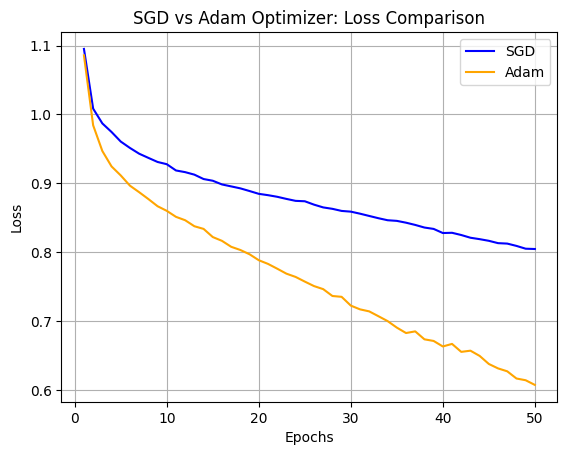

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# 1. Create synthetic data
def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

# 2. Define a simple deep neural network
def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(10,)),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])
    return model

# 3. Train the model and capture loss values, showing the loss per epoch
def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []
    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch+1}/{epochs} - {optimizer_name} loss: {loss:.4f}")
    return history

# 4. Compare performance of SGD and Adam
# Load data
X, y = create_data()

# Create models for SGD and Adam
model_sgd = create_model()
model_adam = create_model()

# Optimizers
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

# Set training parameters
epochs = 50
batch_size = 32

# Train models and capture loss history, while printing epoch iterations
print("\nTraining with SGD optimizer")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# 5. Plot the loss curves for comparison
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD vs Adam Optimizer: Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.8950 - loss: 0.3359 - val_accuracy: 0.9838 - val_loss: 0.0531
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9859 - loss: 0.0464 - val_accuracy: 0.9886 - val_loss: 0.0372
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9890 - loss: 0.0344 - val_accuracy: 0.9901 - val_loss: 0.0304
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 40ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9900 - val_loss: 0.0301
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 32ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9905 - val_loss: 0.0331
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9875 - loss: 0.0382
test accuracy:0.9904999732971191


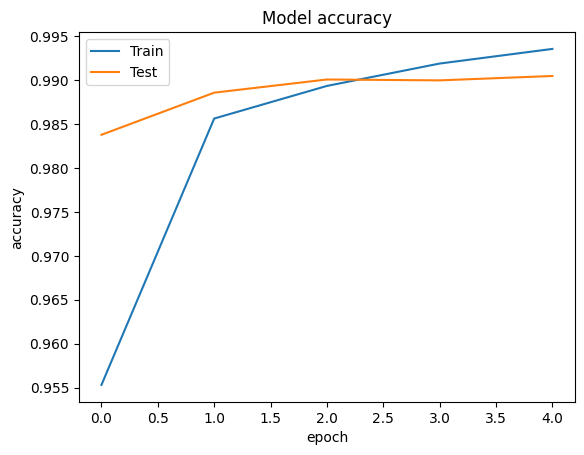

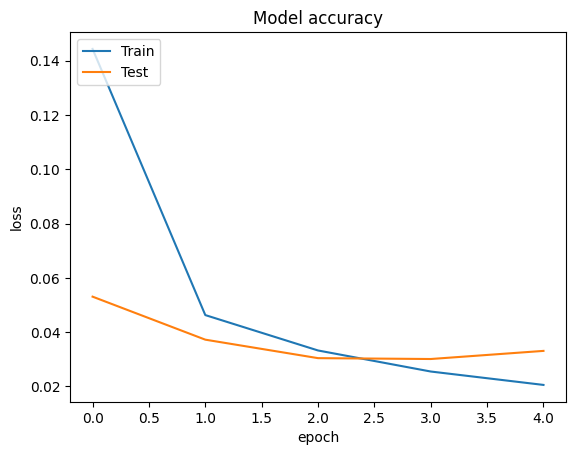

In [ ]:
#importing necessary modeules
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

#load and preprocess the mnsit dataset
(train_images,train_labels),(test_images,test_labels)=(datasets.mnist.load_data())

#normalize pixel values to be between 0 and 1
train_images=train_images.reshape((train_images.shape[0],28,28,1)).astype('float32')/255
test_images=test_images.reshape((test_images.shape[0],28,28,1)).astype('float32')/255

#define the cnn model
model=models.Sequential()

#add convolutional layers,followed by pooling layers
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#add dense layers for classication
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#train th model
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

#evaluate the model on the test set
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"test accuracy:{test_acc}")

#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()








In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10  # Assuming you're using CIFAR-10

# Load and preprocess the dataset (CIFAR-10 in this case)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape the data for LeNet (CIFAR-10 images are 32x32x3)
train_images = np.resize(train_images, (train_images.shape[0], 32, 32, 3))
test_images = np.resize(test_images, (test_images.shape[0], 32, 32, 3))

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Split into validation data (80/20 split)
val_images = train_images[40000:]
val_labels = train_labels[40000:]
train_images = train_images[:40000]
train_labels = train_labels[:40000]

# LeNet Model (32x32 images)
def lenet(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=input_shape))
    model.add(layers.AvgPool2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AvgPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# AlexNet Model (224x224 images)
def alexnet(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(256, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# GoogLeNet Model (InceptionV3)
def googlenet(input_shape, num_classes):
    model = InceptionV3(weights=None, input_shape=input_shape, classes=num_classes)
    return model

# Create and compile the models
lenet_model = lenet(input_shape=(32, 32, 3), num_classes=10)
alexnet_model = alexnet(input_shape=(224, 224, 3), num_classes=10)
googlenet_model = googlenet(input_shape=(224, 224, 3), num_classes=10)

# Compile the models
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
googlenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models (Note: AlexNet and GoogLeNet require 224x224 images)
history_lenet = lenet_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)
history_alexnet = alexnet_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)
history_googlenet = googlenet_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=32)

# Evaluate the models
test_loss_lenet, test_accuracy_lenet = lenet_model.evaluate(test_images, test_labels)
test_loss_alexnet, test_accuracy_alexnet = alexnet_model.evaluate(test_images, test_labels)
test_loss_googlenet, test_accuracy_googlenet = googlenet_model.evaluate(test_images, test_labels)

print(f'LeNet Test Accuracy: {test_accuracy_lenet}')
print(f'AlexNet Test Accuracy: {test_accuracy_alexnet}')
print(f'GoogLeNet Test Accuracy: {test_accuracy_googlenet}')

# Plot the accuracy comparison
plt.plot(history_lenet.history['accuracy'], label='LeNet')
plt.plot(history_alexnet.history['accuracy'], label='AlexNet')
plt.plot(history_googlenet.history['accuracy'], label='GoogLeNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.3172 - loss: 1.9077 - val_accuracy: 0.4094 - val_loss: 1.6689
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 33ms/step - accuracy: 0.4323 - loss: 1.6136 - val_accuracy: 0.4490 - val_loss: 1.5387
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4825 - loss: 1.4557 - val_accuracy: 0.4874 - val_loss: 1.4408
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.5241 - loss: 1.3439 - val_accuracy: 0.5146 - val_loss: 1.3893
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.5494 - loss: 1.2738 - val_accuracy: 0.5259 - val_loss: 1.3451
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.5712 - loss: 1.2213 - val_accuracy: 0.5394 - val_loss: 1.3210
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.5921 - loss: 1.1518 - val_accuracy: 0.5391 - val_loss: 1.3077
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.6037 -

ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 5 from 2 for '{{node sequential_4_1/conv2d_6_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4_1/max_pooling2d_2_1/MaxPool2d, sequential_4_1/conv2d_6_1/convolution/ReadVariableOp)' with input shapes: [32,2,2,96], [5,5,96,256].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(32, 2, 2, 96), dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Define the model
model = models.Sequential([
    layers.Conv2D(64, kernel_size=7, activation='relu', padding="SAME", input_shape=[28, 28, 1]),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(128, kernel_size=3, activation='relu', padding="SAME"),
    layers.Conv2D(128, kernel_size=3, activation='relu', padding="SAME"),
    layers.MaxPooling2D(pool_size=2),

    layers.Conv2D(256, kernel_size=3, activation='relu', padding="SAME"),
    layers.Conv2D(256, kernel_size=3, activation='relu', padding="SAME"),
    layers.MaxPooling2D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')  # 10 classes for MNIST digits (0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 842s 447ms/step - accuracy: 0.4700 - loss: 1.4601 - val_accuracy: 0.9714 - val_loss: 0.1199
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 857s 444ms/step - accuracy: 0.9025 - loss: 0.3601 - val_accuracy: 0.9783 - val_loss: 0.1083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 859s 443ms/step - accuracy: 0.9310 - loss: 0.2623 - val_accuracy: 0.9786 - val_loss: 0.1587
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 868s 446ms/step - accuracy: 0.9480 - loss: 0.2131 - val_accuracy: 0.9882 - val_loss: 0.0678
Epoch 5/5
 350/1875 ━━━━━━━━━━━━━━━━━━━━ 10:43 422ms/step - accuracy: 0.9608 - loss: 0.1538

In [ ]:
from functools import partial
from tensorflow import keras
DefaultConv2D= partial(keras.layers.Conv2D,kernel_size=3,strides=1,padding="SAME",use_bias=False)
class ResidualUnit(keras.layers.Layer):
    def __init__(self,filters,strides=1,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.activation=keras.activations.get(activation)
        self.main_layers=[
            DefaultConv2D(filters,strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides>1:
            self.skip_layers=[
                DefaultConv2D(filters,kernel_size=1,strides=strides),
                keras.layers.BatchNormalization()
            ]
    def call(self,inputs):
        z=inputs
        for layer in self.main_layers:
            z=layer(z)
        skip_z=inputs
        for layer in self.skip_layers:
            skip_z=layer(skip_z)
        return self.activation(z+skip_z)
model=keras.models.Sequential()
model.add(DefaultConv2D(64,kernel_size=7,strides=2,input_shape=[28,28,1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3,strides=2,padding="same"))
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
    strides=1 if filters==prev_filters else 2
    model.add(ResidualUnit(filters,strides=strides))
    prev_filters=filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


Epoch 1/5
1708/1875 ━━━━━━━━━━━━━━━━━━━━ 5:49 2s/step - accuracy: 0.8907 - loss: 0.4283

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset (32x32 images in 10 classes)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data: normalize to [0, 1] and convert labels to one-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Resize images to 224x224 for ResNet50
x_train_resized = tf.image.resize(x_train, (224, 224))
x_test_resized = tf.image.resize(x_test, (224, 224))

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Add custom layers on top for CIFAR-10 classification
model = models.Sequential([
    base_model,  # Add ResNet50 as the base
    layers.GlobalAveragePooling2D(),  # Pooling layer to reduce dimensions
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_resized, y_train, epochs=10, batch_size=64, validation_data=(x_test_resized, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f"Test accuracy: {test_acc:.4f}")


In [ ]:
#program 4
!pip install torch
!pip install google-colab-patches
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#load the faster R-cnn model pre trained on coco dataset
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

ERROR: Could not find a version that satisfies the requirement google-colab-patches (from versions: none)
ERROR: No matching distribution found for google-colab-patches


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 61.3MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
#conti
#coco datset labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'tooth',
]


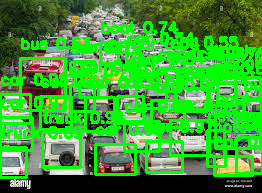

In [ ]:
#conti
def detect_objects(image_path,confidence_threshold=0.5):
    #load and preprocess the image
    image=cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None
    original_image=image.copy()
    #convert image to tensor and normalize
    image_tensor=F.to_tensor(image)
    with torch.no_grad():
        #perform inference
        predictions=model([image_tensor])
    #Extract detected boxes,labels and scores
    boxes=predictions[0]['boxes'].cpu().numpy()
    labels=predictions[0]['labels'].cpu().numpy()
    scores=predictions[0]['scores'].cpu().numpy()

    #draw bounding boxes for high confidence detections
    for i,box in enumerate(boxes):
        if scores[i]>=confidence_threshold:
            label=COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score=scores[i]
            start_point=(int(box[0]),int(box[1]))
            end_point=(int(box[2]),int(box[3]))
            cv2.rectangle(original_image,start_point,end_point,(0,255,0),2)
            cv2.putText(original_image,f"{label} {score:.2f}",(start_point[0],start_point[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
    return original_image

if __name__=="__main__":
    IMAGE_PATH="/content/traffic.jpg"
    detected_image = detect_objects(IMAGE_PATH)

    if detected_image is not None:
        from google.colab.patches import cv2_imshow  # For Jupyter notebooks, especially in Google Colab
        cv2_imshow(detected_image)  # Display the detected image
        cv2.waitKey(0)
        cv2.destroyAllWindows()

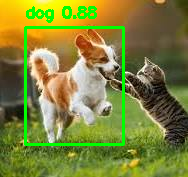

In [ ]:
def detect_objects(image_path,confidence_threshold=0.5):
    #load and preprocess the image
    image=cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None
    original_image=image.copy()
    #convert image to tensor and normalize
    image_tensor=F.to_tensor(image)
    with torch.no_grad():
        #perform inference
        predictions=model([image_tensor])
    #Extract detected boxes,labels and scores
    boxes=predictions[0]['boxes'].cpu().numpy()
    labels=predictions[0]['labels'].cpu().numpy()
    scores=predictions[0]['scores'].cpu().numpy()

    #draw bounding boxes for high confidence detections
    for i,box in enumerate(boxes):
        if scores[i]>=confidence_threshold:
            label=COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score=scores[i]
            start_point=(int(box[0]),int(box[1]))
            end_point=(int(box[2]),int(box[3]))
            cv2.rectangle(original_image,start_point,end_point,(0,255,0),2)
            cv2.putText(original_image,f"{label} {score:.2f}",(start_point[0],start_point[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
    return original_image

if __name__=="__main__":
    IMAGE_PATH="/content/dog_cat.jpg"
    detected_image = detect_objects(IMAGE_PATH)

    if detected_image is not None:
        from google.colab.patches import cv2_imshow  # For Jupyter notebooks, especially in Google Colab
        cv2_imshow(detected_image)  # Display the detected image
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

# Load the pre-trained ResNet50 model
model = keras.applications.resnet50.ResNet50(weights='imagenet')

# Load your image using OpenCV
IMAGE_PATH = "/content/traffic.jpg"  # Replace with your image path
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
images = np.expand_dims(image, axis=0) # Add batch dimension


# Resize the image
images_resized = tf.image.resize(images, [224, 224])

# Preprocess the image
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

# Perform inference
Y_proba = model.predict(inputs)

# Decode predictions
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)

# Print predictions
for image_index in range(len(images)):
    print(f"Image {image_index + 1}:")
    for class_id, name, y_proba in top_K[image_index]:
        print("{}-{:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
!pip install ultralytics
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO

# Load the YOLOv5 model
model = YOLO('yolov5s.pt')  # 'yolov5s.pt' is a small, fast pre-trained YOLO model

def detect_objects_video(video_path, output_path=None, confidence_threshold=0.5):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    # Get video properties
    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter if saving output
    out = None
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0  # To limit frames shown in Colab
    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Perform object detection on the frame
        results = model(frame)

        # Parse YOLO results and draw boxes on the frame
        for result in results:
            for box in result.boxes:
                if box.conf >= confidence_threshold:
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Box coordinates
                    conf = box.conf.item()  # Confidence score
                    cls = int(box.cls.item())  # Class ID
                    label = model.names[cls]  # Class label

                    # Draw bounding box and label on the frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the frame in Colab
        if frame_count < 10:  # Display the first 10 frames
            cv2_imshow(frame)
            frame_count += 1

        # Write frame to output video
        if out:
            out.write(frame)

    # Release video objects
    video.release()
    if out:
        out.release()

if __name__ == "__main__":
    VIDEO_PATH = "/content/46026-447087782_small.mp4"  # Replace with your input video file
    OUTPUT_PATH = "/content/output_video.mp4"  # Set to None if you don't want to save
    detect_objects_video(VIDEO_PATH, OUTPUT_PATH)


In [ ]:
!pip install deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 43.2 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 12.7 MB/s eta 0:00:00


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort

# Load the YOLO model
model = YOLO('yolov8s.pt')  # Replace 'yolov8s.pt' with your desired YOLO model

# Initialize DeepSORT tracker
tracker = DeepSort(max_age=30, n_init=3, nn_budget=70)

def detect_and_track_objects(video_path, output_path=None, confidence_threshold=0.5):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    if not video.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    # Get video properties
    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter if saving output
    out = None
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
        out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0  # To limit frames shown in Colab
    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Perform object detection on the frame
        results = model(frame)

        detections = []
        for result in results:
            for box in result.boxes:
                if box.conf >= confidence_threshold:
                    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Box coordinates
                    conf = box.conf.item()  # Confidence score
                    cls = int(box.cls.item())  # Class ID

                    # Append detection for tracking
                    detections.append(([x1, y1, x2, y2], conf, cls))

        # Update the DeepSORT tracker
        tracks = tracker.update_tracks(detections, frame=frame)

        # Draw detections and track IDs on the frame
        for track in tracks:
            if not track.is_confirmed() or track.time_since_update > 1:
                continue

            track_id = track.track_id
            bbox = track.to_tlbr()  # Get bounding box in (top-left, bottom-right) format

            x1, y1, x2, y2 = map(int, bbox)

            # Retrieve label safely
            if track.det_class is not None and track.det_class < len(model.names):
                label = model.names[track.det_class]
            else:
                label = "Unknown"

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"ID {track_id} {label}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the frame in Colab
        if frame_count < 10:  # Display the first 10 frames
            cv2_imshow(frame)
            frame_count += 1

        # Write frame to output video
        if out:
            out.write(frame)

    # Release video objects
    video.release()
    if out:
        out.release()

if __name__ == "__main__":
    VIDEO_PATH = "/content/1625973-hd_1920_1080_25fps.mp4"  # Replace with your input video file
    OUTPUT_PATH = "/content/output_video.mp4"  # Set to None if you don't want to save
    detect_and_track_objects(VIDEO_PATH, OUTPUT_PATH)




In [ ]:
# Q5
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense,SimpleRNN



#load rhe dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#normalize the input data to range(0,1)
x_train=x_train/255.0
x_test=x_test/255.0

#convert the labels to one-hot encoding
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

#rnn expects sequential data,so we treat each row of the image asa time step
timesteps=x_train.shape[1] #28rows
input_dim=x_train.shape[2] #28 columns



#model
model=Sequential([SimpleRNN(128,input_shape=(timesteps,input_dim),activation='relu'),
                  Dense(64,activation='relu'),
                  Dense(10,activation='softmax')
])

#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

#evaluate the model
test_loss,test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f"Test accuracy:{test_accuracy:.2f}")









11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.6944 - loss: 0.9053 - val_accuracy: 0.9403 - val_loss: 0.1971
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9296 - loss: 0.2382 - val_accuracy: 0.9391 - val_loss: 0.2053
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9492 - loss: 0.1752 - val_accuracy: 0.9607 - val_loss: 0.1355
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9577 - loss: 0.1470 - val_accuracy: 0.9628 - val_loss: 0.1357
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9649 - loss: 0.1237 - val_accuracy: 0.9637 - val_loss: 0.1269
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9643 - loss: 0.1241 - val_accuracy: 0.9520 - val_loss: 0.1824
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9661 - loss: 0.1205 - val_accuracy: 0.9612 - val_loss: 0.1404
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9685 - loss: 0.1109 - v

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from PIL import Image

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

timesteps = x_train.shape[1]  # 28 rows
input_dim = x_train.shape[2]  # 28 columns

# Define the model
model = Sequential([
    SimpleRNN(256, input_shape=(timesteps, input_dim), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")

def predict_handwritten_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, timesteps, input_dim)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    return predicted_class, confidence
image_path = "/content/5.png"
predicted_class, confidence = predict_handwritten_image(image_path)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.6068 - loss: 1.1189 - val_accuracy: 0.9315 - val_loss: 0.2258
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.9345 - loss: 0.2387 - val_accuracy: 0.9325 - val_loss: 0.2773
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9503 - loss: 0.1847 - val_accuracy: 0.9662 - val_loss: 0.1257
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9610 - loss: 0.1448 - val_accuracy: 0.9657 - val_loss: 0.1196
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9678 - loss: 0.1219 - val_accuracy: 0.9707 - val_loss: 0.1124
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9736 - loss: 0.1001 - val_accuracy: 0.9710 - val_loss: 0.1042
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9725 - loss: 0.1024 - val_accuracy: 0.9704 - val_loss: 0.1497
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9722 - loss: 0.1055 - 

FileNotFoundError: [Errno 2] No such file or directory: '/content/5.png'

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from PIL import Image

# Load the dataset (only for training the model, not for prediction)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the input data to range(0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# LSTM expects sequential data, so we treat each row of the image as a time step
timesteps = x_train.shape[1]  # 28 rows
input_dim = x_train.shape[2]  # 28 columns

# Define the model
model = Sequential([
    LSTM(128, input_shape=(timesteps, input_dim), activation='relu', return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")

# Function to preprocess and predict a single handwritten image
def predict_handwritten_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels

    # Normalize and reshape the image
    img_array = np.array(img) / 255.0  # Normalize to range [0, 1]
    img_array = img_array.reshape(1, timesteps, input_dim)  # Reshape to match model input

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    return predicted_class, confidence

# Example: Predicting a handwritten digit
# Replace 'path_to_image.png' with the path to your handwritten image file
image_path = "/content/3.jpg "
print(image_path)
predicted_class, confidence = predict_handwritten_image(image_path)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")
